In [110]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']="AppleGothic"
matplotlib.rcParams['axes.unicode_minus']=False

In [111]:
df1 = pd.read_csv('../data/2014년 졸음운전 교통사고.csv', encoding='euc-kr')
df2 = pd.read_csv('../data/2015년 졸음운전 교통사고.csv', encoding='euc-kr')
df3 = pd.read_csv('../data/2016년 졸음운전 교통사고.csv', encoding='euc-kr')

In [11]:
df3

,구분,사고(건),사망(명),부상(명)
0,2016년1월,192,5,387
1,2016년2월,174,6,328
2,2016년3월,217,7,435
3,2016년4월,216,7,419
4,2016년5월,239,13,522
5,2016년6월,200,12,362
6,2016년7월,227,9,460
7,2016년8월,230,7,490
8,2016년9월,187,13,347
9,2016년10월,183,10,367


In [ ]:
# 1. 여러 데이터프레임을 합치시오.
# 2. 년도, 월별로 인덱스를 설정(멀티인덱스) 하고 데이터를 보여 주시요
# 3. 년도 및 월별 평균 사망자를 보여주시요
# 4. 2016년 사고대비 사망율을 보여 주시요
# 5. 2014년도 월별 사망, 부상 데이터를 바차트로 보여주시요
# 6. 2015년 대비  사망이 가장 많이 증가한
# 2016년 도 월을 구하시요

In [128]:
# 1. 여러 데이터프레임 합치기
mdf = pd.concat(objs=[df1, df2, df3])
mdf

,구분,사고(건),사망(명),부상(명)
0,2014년1월,169,7,347
1,2014년2월,145,3,268
2,2014년3월,206,12,358
3,2014년4월,182,4,360
4,2014년5월,218,17,474
5,2014년6월,233,13,457
6,2014년7월,229,14,431
7,2014년8월,222,9,447
8,2014년9월,225,15,430
9,2014년10월,210,14,392


In [113]:
# 2. 년도, 월별로 인덱스를 설정(멀티인덱스) 하고 데이터를 보여 주시요
# mdf['년도', '월'] = mdf['구분']
mdf['년도'] = mdf['구분'].str.extract(r'(\d+)년').astype(int)
mdf['월'] = mdf['구분'].str.extract(r'(\d+)월').astype(int)

In [129]:
# [문제풀이]
mdf['년도'] = mdf['구분'].str[0:5]
mdf['월'] = mdf['구분'].str[5:]
mdf

,구분,사고(건),사망(명),부상(명),년도,월
0,2014년1월,169,7,347,2014년,1월
1,2014년2월,145,3,268,2014년,2월
2,2014년3월,206,12,358,2014년,3월
3,2014년4월,182,4,360,2014년,4월
4,2014년5월,218,17,474,2014년,5월
5,2014년6월,233,13,457,2014년,6월
6,2014년7월,229,14,431,2014년,7월
7,2014년8월,222,9,447,2014년,8월
8,2014년9월,225,15,430,2014년,9월
9,2014년10월,210,14,392,2014년,10월


In [130]:
mdf.drop(columns="구분", inplace=True)
mdf

,사고(건),사망(명),부상(명),년도,월
0,169,7,347,2014년,1월
1,145,3,268,2014년,2월
2,206,12,358,2014년,3월
3,182,4,360,2014년,4월
4,218,17,474,2014년,5월
5,233,13,457,2014년,6월
6,229,14,431,2014년,7월
7,222,9,447,2014년,8월
8,225,15,430,2014년,9월
9,210,14,392,2014년,10월


In [131]:
mdf = mdf[['년도', '월','사고(건)','사망(명)','부상(명)']]
mdf

,년도,월,사고(건),사망(명),부상(명)
0,2014년,1월,169,7,347
1,2014년,2월,145,3,268
2,2014년,3월,206,12,358
3,2014년,4월,182,4,360
4,2014년,5월,218,17,474
5,2014년,6월,233,13,457
6,2014년,7월,229,14,431
7,2014년,8월,222,9,447
8,2014년,9월,225,15,430
9,2014년,10월,210,14,392


In [132]:
mdf.set_index(['년도', '월'])

사고(건)  사망(명)  부상(명)
년도    월                       
2014년 1월     169      7    347
      2월     145      3    268
      3월     206     12    358
      4월     182      4    360
      5월     218     17    474
      6월     233     13    457
      7월     229     14    431
      8월     222      9    447
      9월     225     15    430
      10월    210     14    392
      11월    209     10    386
      12월    178     12    329
2015년 1월     205      8    375
      2월     175      8    375
      3월     237      4    492
      4월     227     10    486
      5월     231      9    504
      6월     207      8    401
      7월     273      7    556
      8월     268     19    534
      9월     252     10    501
      10월    214     14    475
      11월    199      3    398
      12월    213      8    428
2016년 1월     192      5    387
      2월     174      6    328
      3월     217      7    435
      4월     216      7    419
      5월     239     13    522
      6월     200     12    362
      7월     227      9    460
      8월     230      7    490
      9월     187     13    347
      10월    183     10    367
      11월    200      5    418
      12월    168      4    364

In [133]:
mdf

,년도,월,사고(건),사망(명),부상(명)
0,2014년,1월,169,7,347
1,2014년,2월,145,3,268
2,2014년,3월,206,12,358
3,2014년,4월,182,4,360
4,2014년,5월,218,17,474
5,2014년,6월,233,13,457
6,2014년,7월,229,14,431
7,2014년,8월,222,9,447
8,2014년,9월,225,15,430
9,2014년,10월,210,14,392


In [134]:
# 3. 년도 및 월별 평균 사망자를 보여주시요
mdf.groupby(['년도', '월'], sort=False)[['사망(명)']].mean()

사망(명)
년도    월         
2014년 1월     7.0
      2월     3.0
      3월    12.0
      4월     4.0
      5월    17.0
      6월    13.0
      7월    14.0
      8월     9.0
      9월    15.0
      10월   14.0
      11월   10.0
      12월   12.0
2015년 1월     8.0
      2월     8.0
      3월     4.0
      4월    10.0
      5월     9.0
      6월     8.0
      7월     7.0
      8월    19.0
      9월    10.0
      10월   14.0
      11월    3.0
      12월    8.0
2016년 1월     5.0
      2월     6.0
      3월     7.0
      4월     7.0
      5월    13.0
      6월    12.0
      7월     9.0
      8월     7.0
      9월    13.0
      10월   10.0
      11월    5.0
      12월    4.0

In [135]:
# 4. 2016년 사고대비 사망율을 보여 주시요
# 사망률 = round((사망(명) / 사고(건))*100, 2)
df2016 = mdf[mdf['년도'] == '2016년']
df2016

,년도,월,사고(건),사망(명),부상(명)
0,2016년,1월,192,5,387
1,2016년,2월,174,6,328
2,2016년,3월,217,7,435
3,2016년,4월,216,7,419
4,2016년,5월,239,13,522
5,2016년,6월,200,12,362
6,2016년,7월,227,9,460
7,2016년,8월,230,7,490
8,2016년,9월,187,13,347
9,2016년,10월,183,10,367


In [136]:
# 멀티 인덱스를 적용한 경우
mdf.set_index(['년도', '월'],inplace=True)

In [142]:
df2016 = mdf.loc['2016년']
df2016

,사고(건),사망(명),부상(명)
월,,,
1월,192,5,387
2월,174,6,328
3월,217,7,435
4월,216,7,419
5월,239,13,522
6월,200,12,362
7월,227,9,460
8월,230,7,490
9월,187,13,347


In [143]:
df2016['사망률'] = df2016['사망(명)'] / df2016['사고(건)']
df2016

,사고(건),사망(명),부상(명),사망률
월,,,,
1월,192,5,387,0.026042
2월,174,6,328,0.034483
3월,217,7,435,0.032258
4월,216,7,419,0.032407
5월,239,13,522,0.054393
6월,200,12,362,0.060000
7월,227,9,460,0.039648
8월,230,7,490,0.030435
9월,187,13,347,0.069519


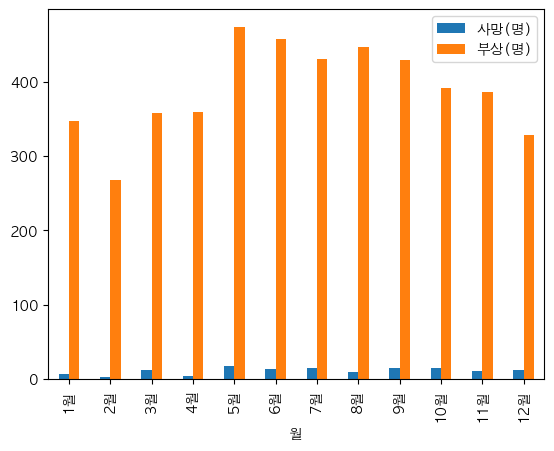

In [145]:
# 5. 2014년도 월별 사망, 부상 데이터를 바차트로 보여주시요
df2014 = mdf.loc['2014년']
# df2014[['사망(명)','부상(명)']].plot(kind='bar')
df2014.plot(kind='bar',y=['사망(명)','부상(명)'])
plt.show()

In [74]:
# 6. 2015년 대비  사망이 가장 많이 증가한 2016년 도 월을 구하시요
mdf['작년대비증가량'] = mdf.groupby('월')['사망(명)'].diff()
mdf[mdf['년도'] == 2016][['월','작년대비증가량']]

,월,작년대비증가량
0,1,-3.0
1,2,-2.0
2,3,3.0
3,4,-3.0
4,5,4.0
5,6,4.0
6,7,2.0
7,8,-12.0
8,9,3.0
9,10,-4.0


In [150]:
# [문제풀이]
mdf2015 = mdf.loc['2015년']
mdf2016 = mdf.loc['2016년']

sr = mdf2016['사망(명)'] - mdf2015['사망(명)']
sr[sr == sr.max()].index

Index(['5월', '6월'], dtype='object', name='월')